In [1]:
import numpy as np
import pandas as pd
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
pip install mlxtend

In [2]:
from sklearn.model_selection import train_test_split,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import seaborn as sns

In [3]:
train= pd.read_csv("train.csv")
test= pd.read_csv("test.csv")

In [4]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [5]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation
0,1,1,1,0,0,1,1,0,0,1,...,15.599481,m,White-European,yes,no,India,no,12.399055,18 and more,Self
1,2,1,0,0,0,0,0,0,1,0,...,27.181099,m,Asian,no,no,Mexico,no,6.551598,18 and more,Self
2,3,1,1,1,0,1,1,0,1,1,...,31.643906,m,White-European,yes,no,Egypt,no,3.180663,18 and more,Self
3,4,0,0,0,0,0,0,0,0,0,...,25.369210,m,?,no,no,India,no,2.220766,18 and more,Self
4,5,0,0,0,1,0,0,0,0,0,...,9.078580,m,?,no,no,Italy,no,7.252028,18 and more,Self


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [7]:
train["Class/ASD"].value_counts()
#train.relation.value_counts()

Class/ASD
0    639
1    161
Name: count, dtype: int64

In [8]:
train.replace({"gender":{"m":0,"f":1}},inplace=True)
train.replace({"jaundice":{"yes":0,"no":1}},inplace=True)
train.replace({"austim":{"yes":0,"no":1}},inplace=True)

In [9]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,...,1,?,1,1,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,0,?,1,1,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,...,0,White-European,1,0,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,...,1,?,1,1,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,...,0,?,1,1,South Africa,no,-4.777286,18 and more,Self,0


In [10]:
x=train.drop(['ethnicity','contry_of_res','used_app_before','age_desc','relation','Class/ASD'],axis=1)
y=train['Class/ASD']

In [11]:
print(y)
print(x)

0      0
1      0
2      1
3      0
4      0
      ..
795    0
796    0
797    0
798    0
799    0
Name: Class/ASD, Length: 800, dtype: int64
      ID  A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  \
0      1         1         0         1         0         1         0   
1      2         0         0         0         0         0         0   
2      3         1         1         1         1         1         1   
3      4         0         0         0         0         0         0   
4      5         0         0         0         0         0         0   
..   ...       ...       ...       ...       ...       ...       ...   
795  796         0         1         0         0         0         0   
796  797         0         1         1         0         0         1   
797  798         0         0         0         0         0         0   
798  799         0         0         0         0         0         0   
799  800         0         1         0         0         0        

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [13]:
model=LogisticRegression(max_iter=1000)

In [14]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=1000)

In [29]:
x_train_predict=model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_predict,y_train)

In [30]:
ytrain=y_train.values
print(ytrain)

[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

In [31]:
y_train.value_counts()

Class/ASD
0    453
1    107
Name: count, dtype: int64

In [32]:
print(x_train_predict)

[1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1
 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0
 1 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 1 0 0 0 1 0 0 

In [33]:
x_train_predict_series = pd.Series(x_train_predict)
print(x_train_predict_series)

0      1
1      0
2      0
3      0
4      0
      ..
555    0
556    0
557    0
558    0
559    0
Length: 560, dtype: int64


In [34]:
x_train_predict_series.value_counts()

0    458
1    102
Name: count, dtype: int64

In [35]:
print('{0:2f}%'.format(training_data_accuracy*100))

87.321429%


In [36]:
x_test_predict=model.predict(x_test)
print(x_test_predict)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [37]:
report_lr=classification_report(x_test_predict,y_test)
print(report_lr)

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       198
           1       0.57      0.74      0.65        42

    accuracy                           0.86       240
   macro avg       0.76      0.81      0.78       240
weighted avg       0.88      0.86      0.86       240



In [38]:
ytest=y_test.values
print(ytest)

[0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 1 1 0
 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1]


In [39]:
testing_data_accuracy=accuracy_score(x_test_predict,y_test)

In [40]:
print('{0:2f}%'.format(testing_data_accuracy*100))

85.833333%


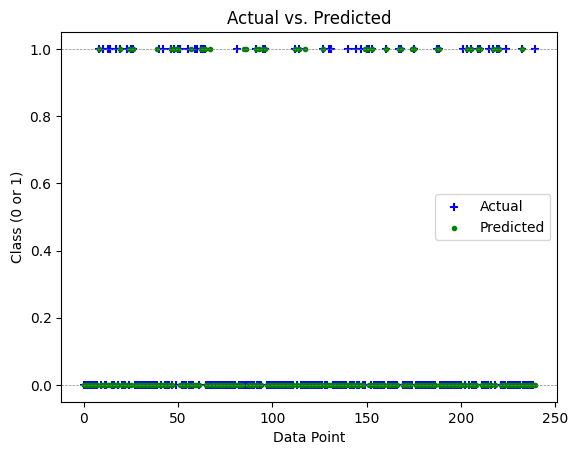

In [41]:
plt.scatter(np.arange(len(ytest)), ytest, color='blue', label='Actual',marker='+')
plt.scatter(np.arange(len(x_test_predict)), x_test_predict, color='green', label='Predicted', marker='.')
plt.axhline(y=0, color='gray', linestyle='--', linewidth=0.5)
plt.axhline(y=1, color='gray', linestyle='--', linewidth=0.5)
plt.xlabel('Data Point')
plt.ylabel('Class (0 or 1)')
plt.title('Actual vs. Predicted')
plt.legend()
plt.show()

In [15]:
# USING DECISION TREE FOR CLASSIFICATION
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree

In [16]:
clf=DecisionTreeClassifier(criterion="entropy", max_depth=7)

In [17]:
clf.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [18]:
x_dt_predict=clf.predict(x_test)
print(x_dt_predict)

[1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]


In [19]:
testing_dt_accuracy=accuracy_score(x_dt_predict,y_test)
print('{0:2f}%'.format(testing_dt_accuracy*100))

80.416667%


In [20]:
report = classification_report(y_test,x_dt_predict)
print(report)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       186
           1       0.58      0.48      0.53        54

    accuracy                           0.80       240
   macro avg       0.72      0.69      0.70       240
weighted avg       0.79      0.80      0.80       240



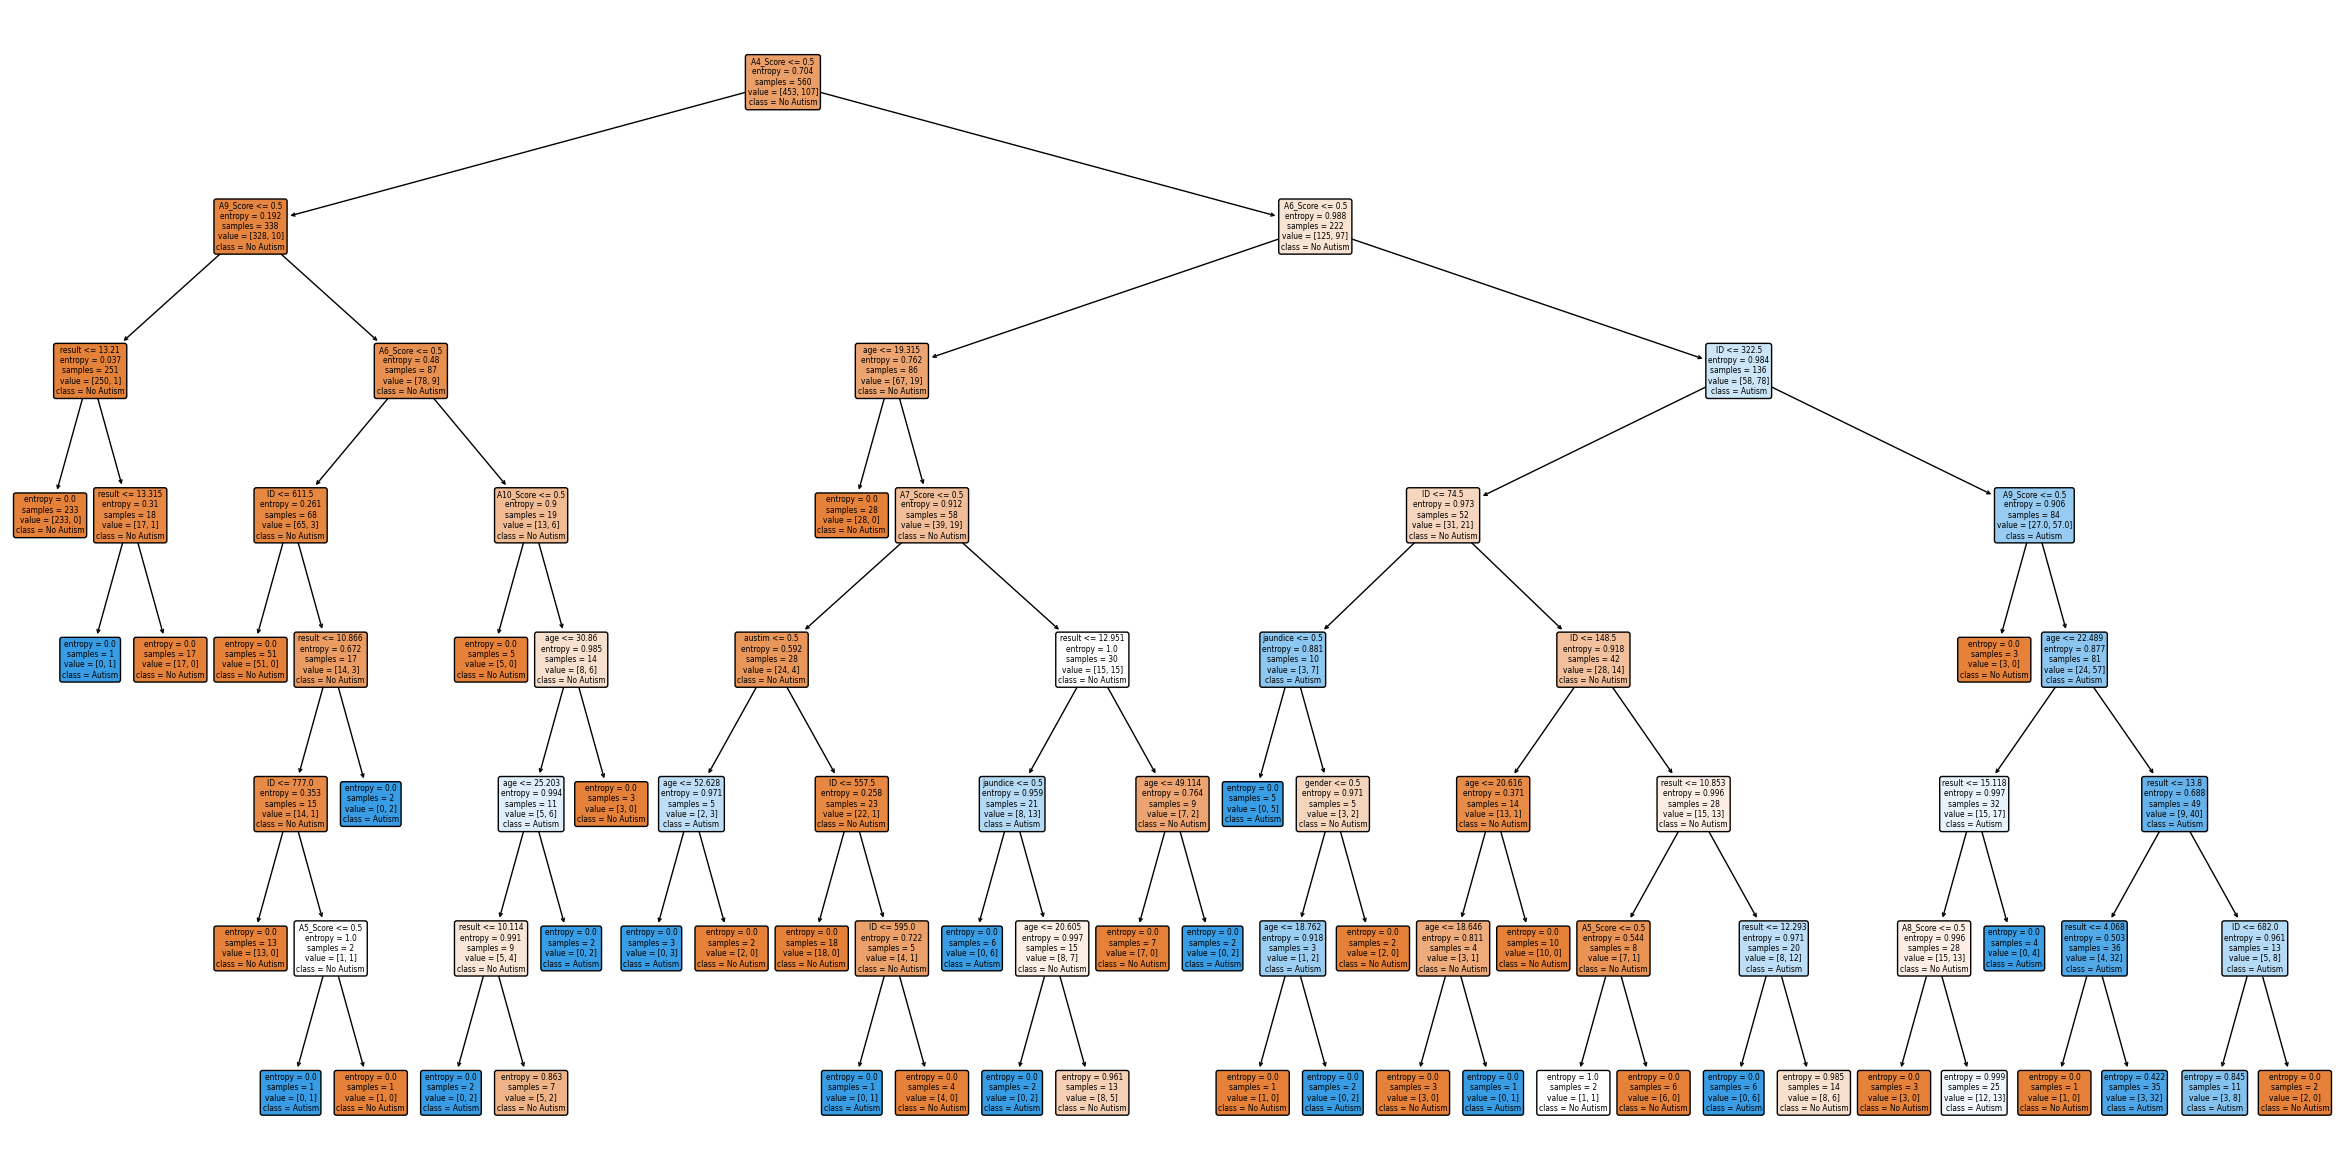

In [21]:
plt.figure(figsize=(30, 15))
plot_tree(clf, feature_names=x.columns, class_names=["No Autism", "Autism"], filled=True, rounded=True)
plt.show()

In [22]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint

In [32]:
RFC=RandomForestClassifier(max_features=3)

In [33]:
RFC.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [34]:
x_rfc_predict=RFC.predict(x_test)
print(x_rfc_predict)

[0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [35]:
test_rfc_accuracy=accuracy_score(x_rfc_predict,y_test)
print('{0:2f}%'.format(test_rfc_accuracy*100))

85.833333%


In [54]:
report_rfc=classification_report(x_rfc_predict,y_test)
print(report_rfc)

              precision    recall  f1-score   support

           0       0.96      0.88      0.92       203
           1       0.54      0.78      0.64        37

    accuracy                           0.86       240
   macro avg       0.75      0.83      0.78       240
weighted avg       0.89      0.86      0.87       240



In [61]:
!pip install graphviz

In [62]:
# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [63]:
for i in range(5):
    tree = RFC.estimators_[i]
    dot_data = export_graphviz(tree,
                               feature_names=x_train.columns,  
                               filled=True,  
                               max_depth=2, 
                               impurity=False, 
                               proportion=True)
    graph = graphviz.Source(dot_data)
    display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [64]:
#tuning randomforestclassifier
param_dist = {'n_estimators': randint(50,500),
              'max_depth': randint(1,20)}
rand_search = RandomizedSearchCV(RFC, 
                                 param_distributions = param_dist, 
                                 n_iter=5, 
                                 cv=5)
rand_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=5,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FDD171A390>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001FDD17BAA90>})

In [65]:
best_rf = rand_search.best_estimator_
print(best_rf)

RandomForestClassifier(max_depth=4, n_estimators=285)


In [66]:
rand_search.best_params_

{'max_depth': 4, 'n_estimators': 285}

In [67]:
x_rand_predict=rand_search.predict(x_test)
print(x_rand_predict)

[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]


In [68]:
test_rand_accuracy=accuracy_score(x_rand_predict,y_test)
print('{0:2f}%'.format(test_rand_accuracy*100))

86.250000%


In [69]:
report_rand=classification_report(x_rand_predict,y_test)
print(report_rand)

              precision    recall  f1-score   support

           0       0.95      0.88      0.91       199
           1       0.57      0.76      0.65        41

    accuracy                           0.86       240
   macro avg       0.76      0.82      0.78       240
weighted avg       0.88      0.86      0.87       240



In [70]:
tree_index = 0 
chosen_tree = best_rf.estimators_[tree_index]
dot_data = export_graphviz(chosen_tree,feature_names=x_train.columns,filled=True,max_depth=11,impurity=False,proportion=True)
graph = graphviz.Source(dot_data)
display(graph)

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [71]:
#using svm
from sklearn import svm
classifier=svm.SVC(kernel='linear',gamma='auto',C=2)
classifier.fit(x_train,y_train)

SVC(C=2, gamma='auto', kernel='linear')

In [72]:
svm_predict=classifier.predict(x_test)

In [73]:
print(100*accuracy_score(svm_predict,y_test))

85.0


In [74]:
print(classification_report(svm_predict,y_test))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       194
           1       0.59      0.70      0.64        46

    accuracy                           0.85       240
   macro avg       0.76      0.79      0.77       240
weighted avg       0.86      0.85      0.85       240



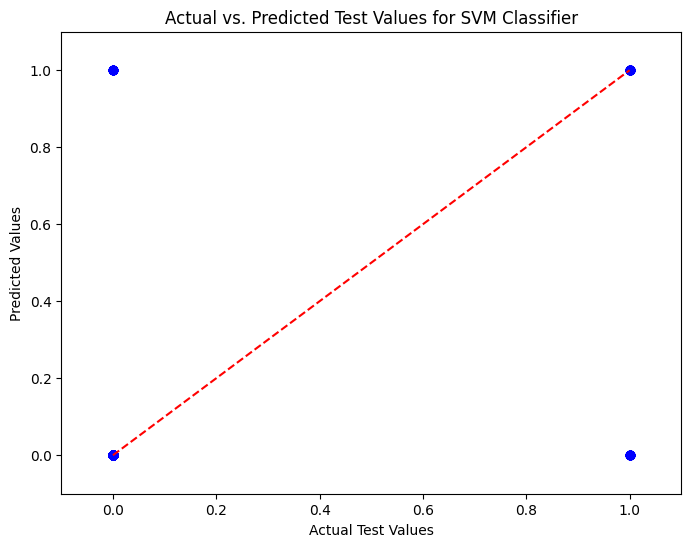

In [75]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, svm_predict, color='blue')
plt.xlabel('Actual Test Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Test Values for SVM Classifier')
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for reference
plt.show()